In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Step 1: Load and Preprocess the IMDB dataset
max_words = 10000  # Consider only the top 10,000 most frequent words
max_len = 200  # Limit review length to 200 words

In [3]:
# Load the dataset (training and testing splits)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

In [4]:
# Pad sequences to ensure uniform input size (200 words per review)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [5]:
# Step 2: Build the Deep Neural Network Model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),  # Embedding layer for word representation
    GlobalAveragePooling1D(),  # Global average pooling layer to reduce dimensions
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

C:\Users\Atharva Digambar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
# Step 3: Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [7]:
# Step 4: Train the model
print("Training the model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Training the model...
Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.6902 - loss: 0.5736 - val_accuracy: 0.8232 - val_loss: 0.3773
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.8891 - loss: 0.2691 - val_accuracy: 0.8785 - val_loss: 0.2912
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.9205 - loss: 0.2117 - val_accuracy: 0.8768 - val_loss: 0.2957
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.9360 - loss: 0.1735 - val_accuracy: 0.8456 - val_loss: 0.3783
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.9349 - loss: 0.1752 - val_accuracy: 0.8632 - val_loss: 0.3465
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9531 - loss: 0.1345 - val_accuracy: 0.8650 - val_loss: 0.3653
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9576 - loss: 0.1222 - val_accuracy: 0.8576 - val_loss: 0.4144
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.

In [8]:
# Step 5: Evaluate the model
print("\nEvaluating the model...")
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")


Evaluating the model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8578 - loss: 0.4871

Test Accuracy: 85.38%


In [9]:
# Step 6: Decode and Predict Sentiments
# Get the word index from the IMDB dataset
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}  # Reverse mapping

In [10]:
def decode_review(encoded_review):
    """Convert an encoded review back into text."""
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

print("\nPredicting sentiments for sample reviews...")
# Predict the sentiment of the first 5 reviews in the test set
predictions = model.predict(X_test[:5])


Predicting sentiments for sample reviews...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


In [11]:
# Display the predictions along with the decoded reviews and actual labels
for i, pred in enumerate(predictions):
    decoded_review = decode_review(X_test[i])
    sentiment = "Positive" if pred >= 0.5 else "Negative"
    actual_sentiment = "Positive" if y_test[i] == 1 else "Negative"
    print(f"\nReview {i+1}:")
    print(f"Text: {decoded_review}")
    print(f"Predicted Sentiment: {sentiment}, Actual Label: {actual_sentiment}")


Review 1:
Text: ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss
Predicted Sentiment: Negative, Actual Label: Negative

Review 2:
Text: psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker charac

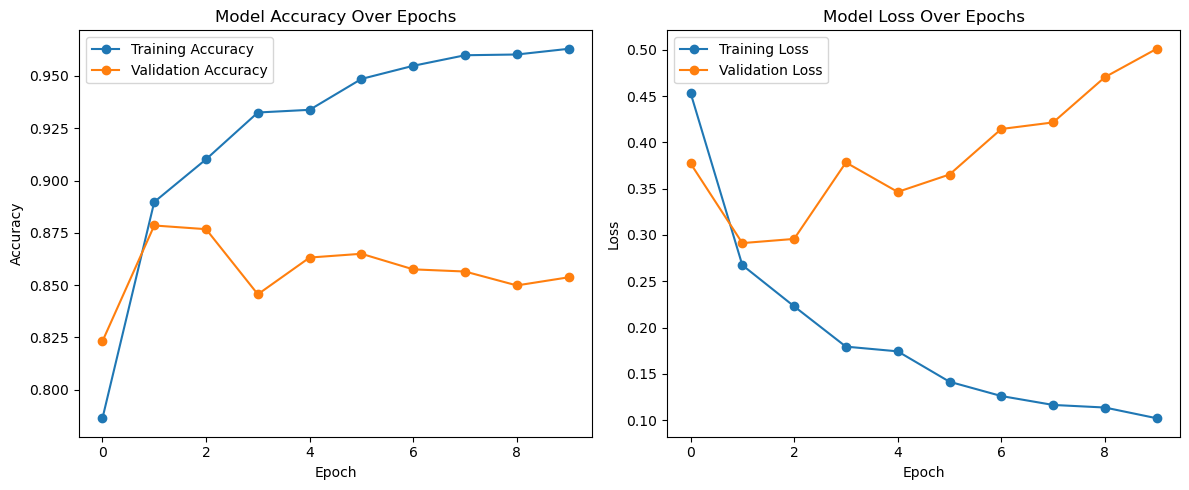

In [12]:
import matplotlib.pyplot as plt


# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 200, 128)            │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,864,965 (14.74 MB)

 Trainable params: 1,288,321 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,576,644 (9.83 MB)